In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [428]:
dataset = pd.read_csv('movie_metadata.csv')

In [429]:
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,10000.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [430]:
def classify(col):
    if col['imdb_score']>=0 and col['imdb_score']<4:
        return 0
    if col['imdb_score']>=4 and col['imdb_score']<6:
        return 1
    if col['imdb_score']>=6 and col['imdb_score']<8:
        return 2
    if col['imdb_score']>=8 and col['imdb_score']<=10:
        return 3

In [431]:
#cleaning
dataset['rating'] = dataset.apply(classify, axis = 1)

In [432]:
#replacing NaNs by medians
def  fill_nan(col):
    dataset[col] = dataset[col].fillna(dataset[col].median())

cols = list(dataset.columns)
fill_nan(cols)

In [433]:
#find missing values if any
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating
count,5043.000000,5043.000000,5043.000000,5043.000000,5043.00000,5.043000e+03,5.043000e+03,5043.000000,5043.000000,5043.000000,5.043000e+03,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000,5043.000000
mean,139.869720,107.124132,671.439818,642.868531,6490.47214,4.433833e+07,8.315077e+04,9638.549177,1.366647,271.573468,3.781071e+07,2002.574658,1643.190561,6.441959,2.233119,7470.780984,1.748959
std,120.535511,24.774814,2779.281116,1658.130651,14979.85268,6.247029e+07,1.378445e+05,18119.377709,2.001342,375.774914,1.958590e+08,12.225589,4025.851655,1.116440,1.338851,19308.507567,0.613575
min,1.000000,7.000000,0.000000,0.000000,0.00000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000,0.000000
25%,51.000000,93.000000,8.000000,139.500000,625.00000,9.116578e+06,8.972500e+03,1442.000000,0.000000,67.000000,7.500000e+06,1999.000000,290.000000,5.800000,1.850000,0.000000,1.000000
50%,110.000000,103.000000,49.000000,372.000000,989.00000,2.559138e+07,3.450400e+04,3097.500000,1.000000,157.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,165.500000,2.000000
75%,192.000000,117.000000,188.000000,633.000000,11000.00000,5.089081e+07,9.444550e+04,13629.500000,2.000000,322.000000,4.000000e+07,2010.000000,912.000000,7.200000,2.350000,3000.000000,2.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.00000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000,3.000000


In [434]:
#normalising and standardising using StandardScaler
col = list(dataset.describe().columns)
col.remove('rating')
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
temp = sc.fit_transform(dataset[col])
dataset[col] = temp
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,rating
0,Color,James Cameron,4.838309,2.861087,3.356798,0.127947,Joel David Moore,-0.366560,11.465267,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,1.017104,0.525617,-0.175680,1.306103,-0.338472,1.322306,2.0
1,Color,Gore Verbinski,1.345216,2.497779,-0.039021,0.215403,Orlando Bloom,2.237195,4.243491,Action|Adventure|Fantasy,...,English,USA,PG-13,1.338796,0.362010,0.833896,0.589468,0.087308,-0.386955,2.0
2,Color,Sam Mendes,3.834356,1.650060,-0.241612,-0.290638,Rory Kinnear,0.301069,2.493206,Action|Adventure|Thriller,...,English,UK,PG-13,1.057954,1.016440,-0.310571,0.320731,0.087308,4.015686,2.0
3,Color,Christopher Nolan,5.585051,2.295941,7.674889,13.484672,Christian Bale,1.369277,6.464391,Action|Thriller,...,English,USA,PG-13,1.083485,0.771028,5.305443,1.843579,0.087308,8.107553,3.0
4,NaN,Doug Walker,-0.247833,-0.166481,-0.194472,-0.163374,Rob Walker,-0.424577,-0.300124,Documentary,...,NaN,NaN,NaN,-0.090945,0.198402,-0.405219,0.589468,0.087308,-0.386955,2.0


In [435]:
X = dataset[col]

In [202]:
#Use PCA to find top 2 most relevent attributes
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

X

array([[12.08217864, -7.35362826],
       [ 5.87212023, -0.2538262 ],
       [ 5.11926933, -2.558325  ],
       ...,
       [-1.8300404 ,  0.14828343],
       [-1.56078307,  0.69131769],
       [-1.64529085, -0.16046212]])

## Clustering using K-Means

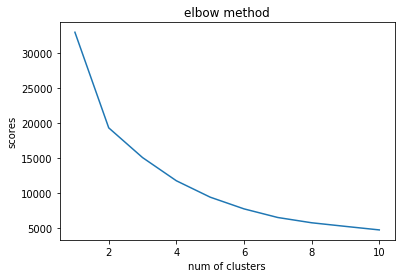

In [188]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('num of clusters')
plt.ylabel('scores')
plt.show()


In [189]:
#pick num of clusters = 5 and apply k-means
kmeans = KMeans(n_clusters = 5, max_iter = 300, n_init = 10)
y_means = kmeans.fit_predict(X)


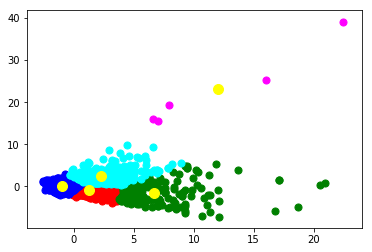

In [193]:
plt.scatter(X[y_means == 0, 0],X[y_means == 0 , 1],s = 50, color ='red', label='cluster 1')
plt.scatter(X[y_means == 1, 0],X[y_means == 1 , 1],s = 50, color ='blue', label='cluster 2') 
plt.scatter(X[y_means == 2, 0],X[y_means == 2 , 1],s = 50,color ='green', label='cluster 3') 
plt.scatter(X[y_means == 3, 0],X[y_means == 3 , 1],s = 50,color ='cyan', label='cluster 4') 
plt.scatter(X[y_means == 4, 0],X[y_means == 4 , 1],s = 50,color ='magenta', label='cluster 5') 
plt.scatter(kmeans.cluster_centers_[: , 0],kmeans.cluster_centers_[: , 1],s = 100,color ='yellow', label='centorids') 
plt.show()

## Clustering using dendrogram (Heirarchial clustering)

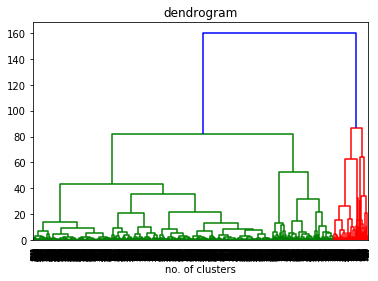

In [207]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method= 'ward'))
plt.title('dendrogram')
plt.xlabel('no. of clusters')
plt.show()

In [210]:
#choose no. of cluster = 5
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

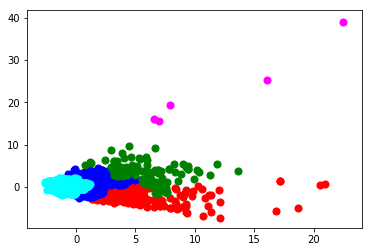

In [215]:
#visualize
plt.scatter(X[y_hc == 0, 0],X[y_hc == 0 , 1],s = 50,color ='red') 
plt.scatter(X[y_hc == 1, 0],X[y_hc == 1 , 1],s = 50, color ='blue') 
plt.scatter(X[y_hc == 2, 0],X[y_hc == 2 , 1],s = 50,color ='green') 
plt.scatter(X[y_hc == 3, 0],X[y_hc == 3 , 1],s = 50,color ='cyan') 
plt.scatter(X[y_hc == 4, 0],X[y_hc == 4 , 1],s = 50,color ='magenta') 
plt.show()

# Classification 


In [418]:
y = dataset['rating']
y = y.fillna(0).astype(int)


In [378]:
X

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.838309,2.861087,3.356798,0.127947,-0.366560,11.465267,5.826369,-0.265187,-0.682933,7.405237,1.017104,0.525617,-0.175680,1.306103,-0.338472,1.322306
1,1.345216,2.497779,-0.039021,0.215403,2.237195,4.243491,2.815547,2.136679,-0.682933,2.572078,1.338796,0.362010,0.833896,0.589468,0.087308,-0.386955
2,3.834356,1.650060,-0.241612,-0.290638,0.301069,2.493206,1.398216,0.113782,-0.183219,1.922689,1.057954,1.016440,-0.310571,0.320731,0.087308,4.015686
3,5.585051,2.295941,7.674889,13.484672,1.369277,6.464391,7.699193,5.360564,-0.682933,6.465752,1.083485,0.771028,5.305443,1.843579,0.087308,8.107553
4,-0.247833,-0.166481,-0.194472,-0.163374,-0.424577,-0.300124,-0.603223,-0.524107,-0.682933,-0.304929,-0.090945,0.198402,-0.405219,0.589468,0.087308,-0.386955
5,2.672758,1.004178,-0.070687,-0.068076,-0.390595,0.459790,0.936316,-0.428620,-0.183219,1.241362,1.153440,0.771028,-0.251199,0.141572,0.087308,0.856144
6,2.091958,1.973000,-0.241612,2.024849,1.168988,4.677759,2.175894,2.010006,-0.682933,4.339268,1.124335,0.362010,2.324412,-0.216745,0.087308,-0.386955
7,1.527753,-0.287584,-0.236214,-0.216451,-0.379979,2.504942,1.535645,-0.419623,-0.183219,0.307200,1.134547,0.607421,-0.270824,1.216524,-0.286184,1.115123
8,4.108162,1.367487,-0.241612,11.072078,1.302514,6.638266,2.753508,4.545941,1.315924,2.250045,1.083485,1.016440,4.808605,0.947786,0.087308,5.724947
9,1.950907,1.851898,-0.140136,5.643741,1.235751,4.124268,1.731428,2.710872,0.816210,1.866799,1.083485,0.525617,2.324412,0.947786,0.087308,0.131003


In [379]:
y

0       2
1       2
2       2
3       3
4       2
5       2
6       2
7       2
8       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      3
18      2
19      2
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      3
28      1
29      2
       ..
5013    2
5014    2
5015    2
5016    1
5017    0
5018    2
5019    1
5020    0
5021    2
5022    2
5023    2
5024    1
5025    2
5026    2
5027    2
5028    2
5029    2
5030    2
5031    1
5032    2
5033    2
5034    2
5035    2
5036    2
5037    2
5038    2
5039    2
5040    2
5041    2
5042    2
Name: rating, Length: 5043, dtype: int64

In [436]:
#split into train and test sets

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

### 1. Using Naive Bayes

In [347]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [350]:
y_pred = classifier.predict(X_test)

In [351]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)

In [352]:
cm

array([[ 26,   5,   1,   0],
       [ 27, 191,  26,   1],
       [  2, 235, 369,  61],
       [  1,   0,  23,  41]])

In [355]:
accuracy = (26+191+369+41)/1009
accuracy

0.6214073339940536

### 2. Using decision tree

In [405]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy') 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [406]:
y_pred = classifier.predict(X_test)

In [390]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[ 32,   0,   0,   0],
       [  0, 245,   0,   0],
       [  0,   0, 667,   0],
       [  0,   0,   0,  65]])

accuracy = 100% => overfitting (will not fit new data properly)

In [407]:
#Excecuted result after applying pca

cm = confusion_matrix(y_test , y_pred)
cm

array([[ 14,  16,   2,   0],
       [  9, 164,  71,   1],
       [  0,  75, 561,  31],
       [  0,   1,  27,  37]])

In [409]:
accuracy = (14+164+561+37)/1009
accuracy

0.7690782953419227

In [392]:
#use pca to eliminate some atrributes to avoid this
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [393]:
explained_variance

array([2.91666182e-01, 1.12570325e-01, 8.51901568e-02, 7.69019199e-02,
       6.34414591e-02, 6.25809276e-02, 5.63886721e-02, 5.30806889e-02,
       4.65967167e-02, 4.36355211e-02, 3.41820741e-02, 2.85441110e-02,
       1.81699396e-02, 1.68045708e-02, 1.01382102e-02, 1.08524221e-04])

In [ ]:
#choose no. of useful variables = 5 and apply PCA after restarting the kernel

In [420]:
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### 3. Using Random Forests 

In [422]:
#Random forest on pca-ed data:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [423]:
y_pred = classifier.predict(X_test)


In [424]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[ 20,  10,   2,   0],
       [  7, 183,  55,   0],
       [  2,  50, 609,   6],
       [  0,   1,  38,  26]])

In [446]:
accuracy = (20+183+609+26)/1009
accuracy

0.8305252725470763